<a href="https://colab.research.google.com/github/emkoval/domashka/blob/main/%D0%9A%D0%BE%D0%B2%D0%B0%D0%BB%D0%B5%D0%BD%D0%BA%D0%BE_%226_scraping_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание 1**

Написать функцию для скрейпинга веб-страниц

In [28]:
'''
Импортируйте библиотеки для скрейпинга веб-страниц
'''
from bs4 import BeautifulSoup
import requests

In [29]:
'''
Допишите функцию для скрейпинга
'''

def scrape_text_from_url(url, tag, class_=None):
    response = requests.get(url) ### ваш код здесь: выполните HTML-запрос ###
    if response.status_code == 200:     ### ваш код здесь: если запрос успешный (возвращается значение 200) ###
      soup = BeautifulSoup (response.text, 'html.parser') ### ваш код здесь: парсим контент или текст с помощью BeautifulSoup html.parser ###
      paragraphs = soup.find_all(tag, class_) # ищем теги и классы на основании аргументов функции; по умолчанию ищем только тег
      text = "" ### ваш код здесь: создаем переменную text строкового типа, куда мы запишем все найденные совпадения ###
      for p in paragraphs:### ваш код здесь: начинаем перебор элементов переменной paragraphs ###
        text += p.get_text() # извлекаем текстовые данные
      return text
    else: ### ваш код здесь: иначе ###
      print(response.status_code, response.text)  ### ваш код здесь: выводим статус-код и сообщение об ошибке ###

In [30]:
'''
Проверяем функцию для скрейпинга: пример 1
'''

scrape_text_from_url('https://en.wikipedia.org/wiki/Chomsky_hierarchy', 'p')

'The Chomsky hierarchy in the fields of formal language theory, computer science, and linguistics, is a containment hierarchy of classes of formal grammars. A formal grammar describes how to form strings from a language\'s vocabulary (or alphabet) that are valid according to the language\'s syntax. The linguist Noam Chomsky theorized that four different classes of formal grammars existed that could generate increasingly complex languages. Each class can also completely generate the language of all inferior classes (set inclusive).\nThe general idea of a hierarchy of grammars was first described by Noam Chomsky in "Three models for the description of language" during the formalization of transformational-generative grammar (TGG).[1] Marcel-Paul Schützenberger also played a role in the development of the theory of formal languages; the paper "The algebraic theory of context free languages"[2] describes the modern hierarchy, including context-free grammars.[3]\nIndependently, alongside li

In [31]:
'''
Проверяем функцию для скрейпинга: пример 2
'''

scrape_text_from_url('https://www.rottentomatoes.com/m/civil_war_2024/reviews', 'p', 'review-text')

"Civil War is not a film about why extreme division happens; it’s about the personal impact of division at its worst.A staggering and frequently brilliant film looking at a hopefully just fictionalized version of America destroying itself from within.Garland seems poised to be make political points, to show how our current political dysfunction could lead to something far worse… but he never follows through.This violent tale of anaesthetised reporters is just a war yarn with a twist.This easy digital fakeness is there to get the audience used to it...Rather than glorifying war, the film is artful and meditative, making us feel the pointlessness of this violence, how unglamorous and exhausting and unheroic it is.It’s not always subtle, and in some cases it’s even frustrating with some of its narrative decisions, but nothing can deny its uncanny ability to leave you horrified by how war, civil or otherwise, can be truly monstrous from any humanist angle.The film isn’t very deep, but it d

**Задание 2**
Написать функцию для сентимент-анализа

In [32]:
'''
Загружаем списки слов с положительным и отрицательным значением
'''

!wget https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/neg.txt
!wget https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/pos.txt

with open('neg.txt') as f:
  neg = f.read()

with open('pos.txt') as f:
  pos = f.read()

--2024-12-19 17:40:14--  https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/neg.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44759 (44K) [text/plain]
Saving to: ‘neg.txt.1’

neg.txt.1           100%[===================>]  43.71K  --.-KB/s    in 0.05s   

2024-12-19 17:40:15 (809 KB/s) - ‘neg.txt.1’ saved [44759/44759]

--2024-12-19 17:40:15--  https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/pos.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19093 (19K) [text/plain]
Savin

In [33]:
'''
Создайте списки слов, разделив строку по знаку \n
'''

pos_list, neg_list = pos.split("\n"), neg.split("\n")

pos_list[:10]

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation']

In [66]:
'''
Допишите функцию для анализа тональности
Функция принимает на вход 3 аргумента:
  - переменную text с текстоm для анализа
  - 2 списка со словами для анализа тональности: positive_words и negative_words
'''
import re
import spacy
nlp = spacy.load('en_core_web_sm')
!wget https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/stopwords.txt
with open('stopwords.txt', 'r') as f:
  stopwords = f.read().split()

def analyze_sentiment(text, positive_words, negative_words): ### ваш код здесь ###
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)
    text = nlp(text)
    ### Ваш код здесь: приведите текст к нижнему регистру и поделите его на слова ###

    clean_tokens = []
    for token in text:
      if token.text not in stopwords:
        clean_tokens.append(token)

    words = [word.text for word in clean_tokens]


    ### По желанию: удалить стоп-слова и знаки препинания; использовать NLP-библиотеки для токенизации ###
    ### Важно: запишите результат в переменную words ###

    # Считаем скор тональности: количество пересечений между списками words и положительными / отрицательными словами
    positive_count = sum(1 for word in words if word in positive_words)
    negative_count = sum(1 for word in words if word in negative_words)


    if positive_count > negative_count:
      return 'positive'  ### Ваш код здесь: если положительный скор больше отрицательного, возвращаем строчку 'positive' ###
    elif negative_count > positive_count:
      return "negative"  ### Ваш код здесь: если отрицательный скор больше положительного, возвращаем строчку 'negative' ###
    else:
      return "neutral" ### Иначе возвращаем строчку 'neutral' ###

--2024-12-19 17:56:04--  https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/stopwords.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 954 [text/plain]
Saving to: ‘stopwords.txt.12’

stopwords.txt.12    100%[===================>]     954  --.-KB/s    in 0s      

2024-12-19 17:56:04 (58.2 MB/s) - ‘stopwords.txt.12’ saved [954/954]



In [67]:
'''
Проверяем функцию для анализа тональности: пример 1
'''

analyze_sentiment('This sample text is awesome!', pos_list, neg_list)

'positive'

In [64]:
'''
Проверяем функцию для анализа тональности: пример 2
'''

analyze_sentiment('I hate this sample text.', pos_list, neg_list)

'negative'

In [65]:
'''
Проверяем функцию для анализа тональности: пример 3
'''

analyze_sentiment('We love and hate this sample text at the same time!', pos_list, neg_list)

'neutral'

**Задача 3**

Написать функцию для вывода сентимент-скоров

In [68]:
'''
Допишите функцию для вывода скоров по заданному URL
'''

def analyze(positive_words, negative_words, url, tag, class_=None):
  scraped_text = scrape_text_from_url(url, tag, class_) ### ваш код здесь: примените функцию scrape_text_from_url ###
  sentences = [sentence.strip() for sentence in scraped_text.split(".")] ### ваш код здесь: сегментируйте текст по предложениям (через точку) ###
  sentiments = [] ### ваш код здесь: создаем пустой список, куда запишем скоры ###
  for sentence in sentences: ### ваш код здесь: начинаем перебор по предложениям ###
    sentiments.append(analyze_sentiment(sentence, positive_words, negative_words))  ### ваш код здесь: получаем скор для данного предложения с помощью функции analyze_sentiment ###
    ### ваш код здесь: добавляем скор в созданный список ###
  return sentiments
  ### ваш код здесь: возвращаем список скоров ###

In [62]:
'''
Тест 1
'''

analyze(url='https://en.wikipedia.org/wiki/Chomsky_hierarchy', tag='p', positive_words=pos, negative_words=neg)[:10]

['neutral',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'negative',
 'negative']

In [69]:
'''
Тест 2
'''

analyze(url='https://www.rottentomatoes.com/m/civil_war_2024/reviews', tag='p', class_='review-text', positive_words=pos, negative_words=neg)[:10]

['negative',
 'neutral',
 'negative',
 'negative',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'neutral']

**Задача 4**

Визуализировать результаты анализа

In [73]:
'''
Создаем частотный словарь с помощью библиотеки Counter.
Можно выбрать другие веб-страницы для анализа!
'''

from collections import Counter

sample1 = Counter(analyze(url='https://en.wikipedia.org/wiki/Hot_Fuzz', tag='p', positive_words=pos, negative_words=neg))
sample2 = Counter(analyze(url='https://www.rottentomatoes.com/m/hot_fuzz', tag='p', class_='review-text', positive_words=pos, negative_words=neg))

sample1

Counter({'negative': 86, 'neutral': 47, 'positive': 22})

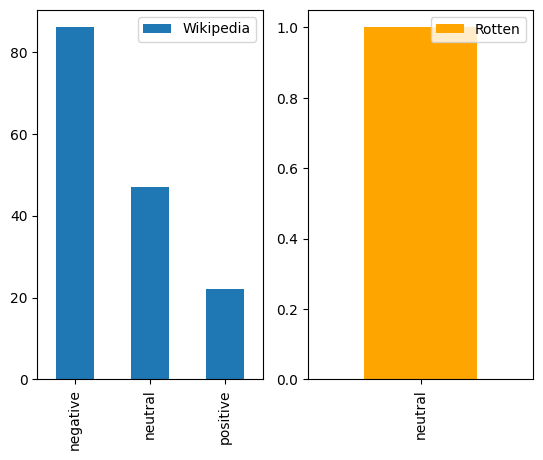

In [74]:
'''
Создаем визуализацию: попробуйте использование новые данные (данные других url)
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.DataFrame.from_dict(sample1, orient='index', columns=['Wikipedia'])
df2 = pd.DataFrame.from_dict(sample2, orient='index', columns=['Rotten'])

fig, ax = plt.subplots(ncols=2)

ax[0] = df1.plot.bar(ax=ax[0])
ax[1] = df2.plot.bar(ax=ax[1], color='orange')

**Задача 5**

Соберите все 3 функции в одной ячейке ниже. Проанализируйте получшившийся код. Сделайте ревью!

Попробуйте сделать **рефакторинг**: найти повторы в коде, избыточные конструкции и заменить их на более простые и питоничные решения. Рефакторинг ускоряет выполнение кода и упрощает его чтение.

Улучшите код, добавьте строчки для вывода промежуточных и итоговых результатов; запустите ячейку.

Это творческое задание, правильных решений нет - главное, чтобы код работал! :)

Не забудьте закомментировать свои изменения.

In [78]:
import re
import spacy
nlp = spacy.load('en_core_web_sm')
!wget https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/stopwords.txt
with open('stopwords.txt', 'r') as f:
  stopwords = f.read().split()
from bs4 import BeautifulSoup
import requests


def scrape_text_from_url(url, tag, class_=None):
    response = requests.get(url)
    if response.status_code == 200:
      soup = BeautifulSoup(response.text, 'html.parser')
      paragraphs = soup.find_all(tag, class_)
      text = "".join([p.get_text() for p in paragraphs])
      # for p in paragraphs:
      #   text += p.get_text()
      return text
    else:
      print(response.status_code, response.text)




def analyze_sentiment(text, positive_words, negative_words):
    # text = text.lower()
    text = nlp(re.sub(r"[^\w\s]", "", text.lower()))
    # text = nlp(text)

    clean_tokens = [token for token in text if token.text not in stopwords]
    # for token in text:
    #   if token.text not in stopwords:
    #     clean_tokens.append(token)

    words = [word.text for word in clean_tokens]

    positive_count = sum(1 for word in words if word in positive_words)
    negative_count = sum(1 for word in words if word in negative_words)

    if positive_count > negative_count:
      return 'positive'
    elif negative_count > positive_count:
      return "negative"
    else:
      return "neutral"



def analyze(positive_words, negative_words, url, tag, class_=None):
  scraped_text = scrape_text_from_url(url, tag, class_)
  sentences = [sentence.strip() for sentence in scraped_text.split(".")]
  sentiments = []
  for sentence in sentences:
    sentiments.append(analyze_sentiment(sentence, positive_words, negative_words))
  return sentiments

--2024-12-19 18:16:06--  https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/stopwords.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 954 [text/plain]
Saving to: ‘stopwords.txt.13’

stopwords.txt.13    100%[===================>]     954  --.-KB/s    in 0s      

2024-12-19 18:16:07 (45.7 MB/s) - ‘stopwords.txt.13’ saved [954/954]

